## Observations and Insights 

In [91]:
#Obersvation 1: Capmulin has been the most effective drug to minimise the tumor volume compared to...
## others in the Drug Regimen as seen in the box plots (note - two outliers were found in the analysis)

#Obervation 2: A regression model was devised for the Capumulin drug on its ability to estimate the Average tumor..
## volume as per a mouse's weight. Model achieved a R-value of 0.84 suggesting a strong relationship between weight..
### and tumor volume. i.e. higher the weight = higher the expected tumor volumen

# Observatuib 3: When tested on mouse a275, it took more than 40 timepoints for the tumor volume to drop below 25..
## below 25 (mm3) volume when tested on Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_total = len(combined_data_df["Mouse ID"])
mice_total

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated_mice = combined_data_df[combined_data_df.duplicated(["Mouse ID"])]
all_duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned_df = combined_data_df.drop_duplicates(subset = ["Mouse ID"])
data_cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_length = len(data_cleaned_df["Mouse ID"])
cleaned_data_length

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_mean = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_median = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_variance = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_std = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_sem = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean": summary_mean,
                          "Median": summary_median,
                          "Variance": summary_variance,
                          "Standard Deviation": summary_std,
                          "SEM": summary_sem
                          })
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
groupby_df = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
groupby_df                                                                                

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements per Treatment')

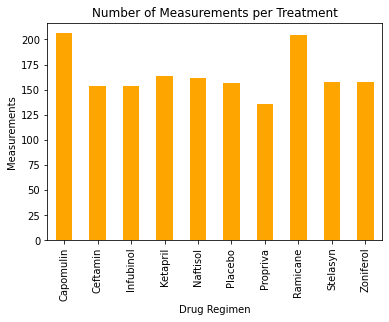

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_panda = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].nunique().plot(kind = "bar", color = "orange")
bar_panda

bar_panda.set_ylabel("Measurements")
bar_panda.set_title("Number of Measurements per Treatment")


Text(0, 0.5, 'Measurements')

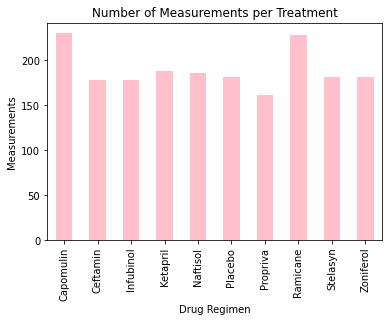

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_type = combined_data_df.groupby("Drug Regimen")

drug_type_count = drug_type["Drug Regimen"].count()
drug_type_count

bar_plyplot = drug_type_count.plot(kind="bar", title="Number of Measurements per Treatment", color="pink")
bar_plyplot.set_ylabel("Measurements")

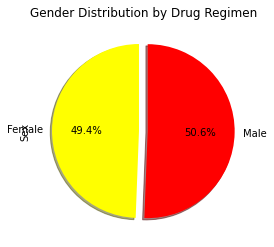

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["yellow","red"]
explode = (0.05,0.05)

gender_pandas = combined_data_df.groupby("Sex")['Sex'].count()

pie= gender_pandas.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%', explode=explode, colors=colors, title = "Gender Distribution by Drug Regimen", startangle=90, shadow = True)
                                      

<function matplotlib.pyplot.show(close=None, block=None)>

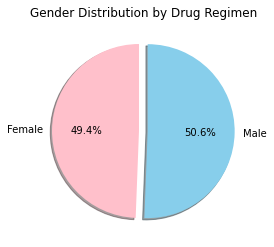

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["pink","skyblue"]
explode = (0.05,0.05)


gender_plyplot = combined_data_df.groupby("Sex")['Sex'].count()

plt.pie(gender_plyplot, autopct='%1.1f%%', explode=explode, colors=colors, startangle=90, shadow = True, labels = gender_plyplot.index )
plt.title("Gender Distribution by Drug Regimen")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs_volume = combined_data_df[combined_data_df["Drug Regimen"].isin(["Infubinol","Capomulin", "Ceftamin", "Ramicane"])]
drugs_volume


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = drugs_volume.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.DataFrame(drugs_volume)

merged_tumor_volume = pd.merge(tumor_volume, greatest_timepoint, on=("Mouse ID","Timepoint"),how="left")
merged_tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments_list


    

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [116]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for rows in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_tumor_vol = merged_tumor_volume.loc[merged_tumor_volume["Drug Regimen"]==rows]
    results = mice_tumor_vol["Tumor Volume (mm3)"]
    tumor_vol.append(results)
    
    
    
    #setup the IQR boundaries and calculate the outliers
    quartiles = results.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    lower_out = lower_q - (1.5*iqr)
    upper_out = upper_q - (1.5*iqr)


    #print the result
    print (f"{rows}")
    print (f"---------------")
    print (f"Lower quartile of the tumor volume is: {lower_q}")
    print (f"Upper quartile of the tumor volume is: {upper_q}")
    print (f"Interquartile range of the tumor volume is: {iqr}")
    print (f"The median value of the tumer volume is {quartiles[0.5]}")
    print (f"Anything below {lower_out} can be an outlier")
    print (f"Anything above {upper_out} can be an outlier\n")


Capomulin
---------------
Lower quartile of the tumor volume is: 37.685932865
Upper quartile of the tumor volume is: 45.0
Interquartile range of the tumor volume is: 7.314067135000002
The median value of the tumer volume is 41.557808879999996
Anything below 26.714832162499995 can be an outlier
Anything above 34.0288992975 can be an outlier

Ramicane
---------------
Lower quartile of the tumor volume is: 36.674634585
Upper quartile of the tumor volume is: 45.0
Interquartile range of the tumor volume is: 8.325365415
The median value of the tumer volume is 40.67323554
Anything below 24.1865864625 can be an outlier
Anything above 32.511951877499996 can be an outlier

Infubinol
---------------
Lower quartile of the tumor volume is: 47.3123533
Upper quartile of the tumor volume is: 57.314443967500004
Interquartile range of the tumor volume is: 10.002090667500006
The median value of the tumer volume is 51.82058438
Anything below 32.309217298749985 can be an outlier
Anything above 42.311307966

outliers have been highlighted in blue


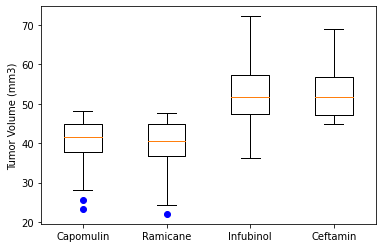

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, sym ="b")
plt.xticks([1,2,3,4], treatments_list)
plt.ylabel("Tumor Volume (mm3)")
plt.show
print(f"outliers have been highlighted in blue")
    

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Time Point vs Tumor Volume')

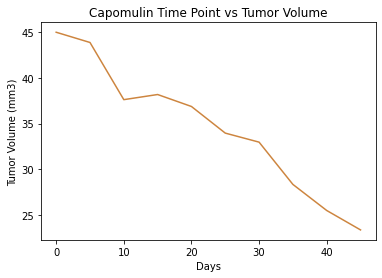

In [90]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line = combined_data_df.loc[combined_data_df["Mouse ID"]=="s185"]
plt.plot(line["Timepoint"],line["Tumor Volume (mm3)"], color="peru")

plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Time Point vs Tumor Volume")

In [135]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_df = combined_data_df.loc[combined_data_df["Drug Regimen"]=="Capomulin"]

#average tumor calculation
average_tumor_df = pd.DataFrame(scatter_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values().reset_index().rename(columns={"Tumor Volume (mm3)":"Average Volume"}))
average_tumor_df

,Mouse ID,Average Volume
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212
5,y793,38.506829
6,m957,39.049816
7,i738,39.141053
8,t565,39.328725
9,u364,39.887495


In [44]:
#merge average_tumor with the line dataframe 
average_merge_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
average_merge_df
                        

#calculate the average tumor volume per mouse

ave_vol = pd.DataFrame(average_merge_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values())
ave_vol

#format the columns 
ave_vol = ave_vol.reset_index().rename(columns = {'Tumor Volume (mm3)': 'Average Tumor Volume'} )
ave_vol.head()

,Mouse ID,Average Tumor Volume
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212


In [54]:
#merge the weight with the average tumor volume df and remove duplicates
scatter = pd.merge(average_merge_df,ave_vol, on="Mouse ID")
scatter.head()

scatter_formatted = scatter[["Weight (g)", "Average Tumor Volume"]].drop_duplicates()
scatter_formatted.head()



,Weight (g),Average Tumor Volume
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495


Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume')

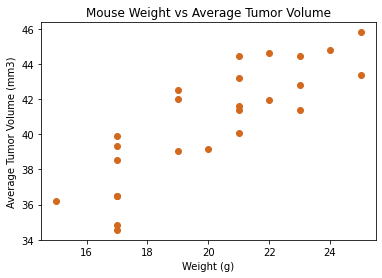

In [66]:
#plot the scatter
x_axis = scatter_formatted["Weight (g)"]
y_axis = scatter_formatted["Average Tumor Volume"]

plt.scatter(x_axis,y_axis, color="chocolate")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")


## Correlation and Regression

The Correlation Coefficient of the Mouse Weight vs Average Tumor Volume model is 0.84


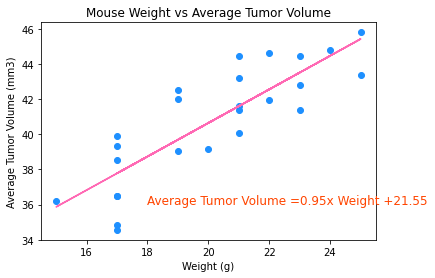

In [89]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight_mouse = average_merge_df.groupby(average_merge_df["Mouse ID"])["Weight (g)"].mean()
volume_average = average_merge_df.groupby(average_merge_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

slope,intercept, r_value, p_value, std_err = st.linregress(weight_mouse,volume_average)
line_of_best_fit = slope * weight_mouse + intercept
regression_equation = "Average Tumor Volume =" + str(round(slope,2)) + "x Weight +" + str(round(intercept,2))

#plot

plt.scatter(weight_mouse,volume_average, color="dodgerblue")
plt.plot(weight_mouse,line_of_best_fit,"r-",color="hotpink")

#format
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.annotate(regression_equation,(18,36),fontsize = 12, color = "orangered")
print(f"The Correlation Coefficient of the Mouse Weight vs Average Tumor Volume model is {round(st.pearsonr(weight_mouse,volume_average)[0],2)}")